# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.210493e+01     9.134508e+00
 * time: 0.0036339759826660156
     1     3.121975e+01     5.248809e+00
 * time: 0.016052961349487305
     2     2.309274e+01     5.612489e+00
 * time: 0.031197071075439453
     3     2.025543e+01     6.529242e+00
 * time: 0.13652300834655762
     4     1.408440e+01     4.280278e+00
 * time: 0.15097594261169434
     5     1.060173e+01     1.683670e+00
 * time: 0.16510701179504395
     6     9.641028e+00     1.562828e+00
 * time: 0.17663192749023438
     7     9.229612e+00     8.187212e-01
 * time: 0.1880629062652588
     8     8.921271e+00     7.079871e-01
 * time: 0.19961905479431152
     9     8.657680e+00     7.162371e-01
 * time: 0.21117210388183594
    10     8.478963e+00     6.668914e-01
 * time: 0.22252893447875977
    11     8.346436e+00     5.369654e-01
 * time: 0.23387408256530762
    12     8.262186e+00     4.085635e-01
 * time: 0.24531292915344238
    13     8.190844e+00     3.232413e-01
 * ti

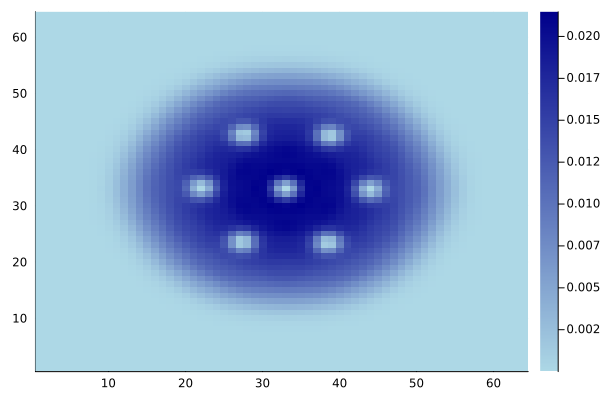

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)